# Waves
Hint: Spherical waves




**Author:** Otto Schaile  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 01:50 AM.</small></i>

In [1]:
%%cpp -d
#include "TROOT.h"
#include "TCanvas.h"
#include "TColor.h"
#include "TArc.h"
#include "TGraph.h"
#include "TF2.h"
#include "TLine.h"
#include "TLatex.h"
#include "TMath.h"
#include "TStyle.h"
#include "Riostream.h"

TF2 * finter;

 ______________________________________________________________
 

In [2]:
%%cpp -d
Double_t interference( Double_t *x, Double_t *par)
{
   Double_t x_p2 = x[0] * x[0];
   Double_t d_2 = 0.5 * par[2];
   Double_t ym_p2 = (x[1] - d_2) * (x[1] - d_2);
   Double_t yp_p2 = (x[1] + d_2) * (x[1] + d_2);
   Double_t  tpi_l = TMath::Pi() /  par[1];
   Double_t amplitude = par[0] * (cos(tpi_l  * sqrt(x_p2 + ym_p2))
                      + par[3] * cos(tpi_l  * sqrt(x_p2 + yp_p2)));
   return amplitude * amplitude;
}

 _____________________________________________________________
 

In [3]:
%%cpp -d
Double_t result( Double_t *x, Double_t *par)
{
   Double_t xint[2];
   Double_t  maxintens = 0, xcur = 14;
   Double_t dlambda = 0.1 * par[1];
   for(Int_t i=0; i<10; i++){
      xint[0] = xcur;
      xint[1] = x[1];
      Double_t  intens = interference(xint, par);
      if(intens > maxintens) maxintens = intens;
      xcur -= dlambda;
   }
   return maxintens;
}

 Arguments are defined. 

In [4]:
Double_t d = 3;
Double_t lambda = 1;
Double_t amp = 10;

In [5]:
TCanvas *c1 = new TCanvas("waves", "A double slit experiment",
   300,40, 1004, 759);
c1->Range(0, -10,  30, 10);
c1->SetFillColor(0);
TPad *pad = new TPad("pr","pr",  0.5, 0 , 1., 1);
pad->Range(0, -10,  15, 10);
pad->Draw();

const Int_t colNum = 30;
Int_t palette[colNum];
for (Int_t i=0;i<colNum;i++) {
   TColor *color = new TColor(1001+i
   ,    pow(i/((colNum)*1.0),0.3)
   ,    pow(i/((colNum)*1.0),0.3)
   ,0.5*(i/((colNum)*1.0)),"");
   palette[i] = 1001+i;
}
gStyle->SetPalette(colNum,palette);
c1->cd();
TF2 * f0 = new TF2("ray_source",interference, 0.02, 15, -8, 8, 4);

f0->SetParameters(amp, lambda, 0, 0);
f0->SetNpx(200);
f0->SetNpy(200);
f0->SetContour(colNum-2);
f0->Draw("samecolz");

TLatex title;
title.DrawLatex(1.6, 8.5, "A double slit experiment");

TGraph *graph = new TGraph(4);
graph->SetFillColor(0);
graph->SetFillStyle(1001);
graph->SetLineWidth(0);
graph->SetPoint(0, 0., 0.1);
graph->SetPoint(1, 14.8, 8);
graph->SetPoint(2, 0, 8);
graph->SetPoint(3, 0, 0.1);
graph->Draw("F");

graph = new TGraph(4);
graph->SetFillColor(0);
graph->SetFillStyle(1001);
graph->SetLineWidth(0);
graph->SetPoint(0, 0, -0.1);
graph->SetPoint(1, 14.8, -8);
graph->SetPoint(2, 0, -8);
graph->SetPoint(3, 0, -0.1);
graph->Draw("F");

TLine * line;
line = new TLine(15,-10, 15, 0 - 0.5*d -0.2);
line->SetLineWidth(10); line->Draw();
line = new TLine(15, 0 - 0.5*d +0.2 ,15, 0 + 0.5*d -0.2);
line->SetLineWidth(10); line->Draw();

line = new TLine(15,0 + 0.5*d + 0.2,15, 10);
line->SetLineWidth(10); line->Draw();

pad ->cd();
finter = new TF2("interference",interference, 0.01, 14, -10, 10, 4);

finter->SetParameters(amp, lambda, d, 1);
finter->SetNpx(200);
finter->SetNpy(200);
finter->SetContour(colNum-2);
finter->Draw("samecolorz");

TArc *arc = new TArc();;
arc->SetFillStyle(0);
arc->SetLineWidth(2);
arc->SetLineColor(5);
Float_t r = 0.5 * lambda, dr = lambda;
for (Int_t i = 0; i < 16; i++) {
   arc->DrawArc(0,  0.5*d, r, 0., 360., "only");
   arc->DrawArc(0, -0.5*d, r, 0., 360., "only");
   r += dr;
}

pad ->cd();
TF2 * fresult = new TF2("result",result, 14, 15, -10, 10, 4);

fresult->SetParameters(amp, lambda, d, 1);
fresult->SetNpx(300);
fresult->SetNpy(300);
fresult->SetContour(colNum-2);
fresult->Draw("samecolor");
line = new TLine(13.8,-10, 14, 10);
line->SetLineWidth(10); line->SetLineColor(0); line->Draw();
c1->Modified(kTRUE);
c1->Update();
c1->SetEditable(kTRUE);

Warning in <TColor::TColor>: color 1001 already defined
Warning in <TColor::TColor>: color 1002 already defined
Warning in <TColor::TColor>: color 1003 already defined
Warning in <TColor::TColor>: color 1004 already defined
Warning in <TColor::TColor>: color 1005 already defined
Warning in <TColor::TColor>: color 1006 already defined
Warning in <TColor::TColor>: color 1007 already defined
Warning in <TColor::TColor>: color 1008 already defined
Warning in <TColor::TColor>: color 1009 already defined
Warning in <TColor::TColor>: color 1010 already defined
Warning in <TColor::TColor>: color 1011 already defined
Warning in <TColor::TColor>: color 1012 already defined
Warning in <TColor::TColor>: color 1013 already defined
Warning in <TColor::TColor>: color 1014 already defined
Warning in <TColor::TColor>: color 1015 already defined
Warning in <TColor::TColor>: color 1016 already defined
Warning in <TColor::TColor>: color 1017 already defined
Warning in <TColor::TColor>: color 1018 already 

Draw all canvases 

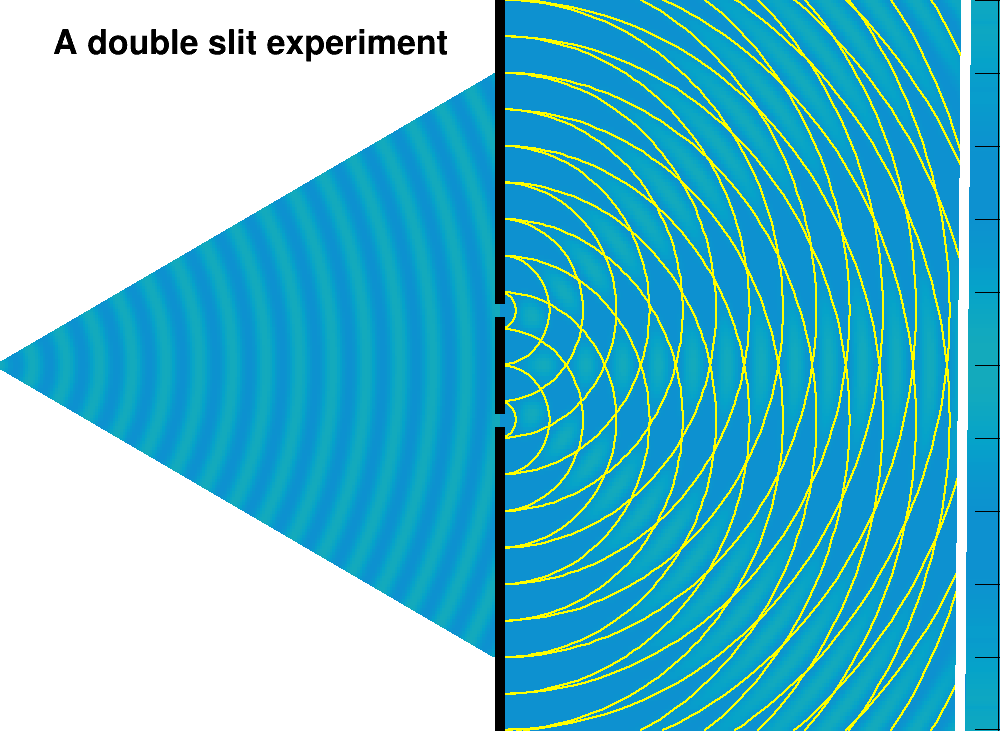

In [6]:
gROOT->GetListOfCanvases()->Draw()